# Third Particle Potential

In [1]:
import sympy as smp
import numpy as np
import matplotlib.pyplot as plt

smp.init_printing()
%matplotlib inline

<img src=ThirdParticle.png width=300px>

What is the potential experienced by the third particle?

# Magnetic potential produced by a dipole moment

The magnetic potential produced by a dipole moment is:

$\newcommand{\vec}[1]{{\bf #1}}$ 

$$U\left(\vec{r}\right) = - \frac{\mu_0}{4\pi}
\left(\frac{3\left(\vec{m}_1\cdot\vec{r}\right)\left(\vec{m}_2\cdot\vec{r}\right)}{\left|r\right|^5} - 
\frac{\vec{m}_1\cdot\vec{m}_2}{\left|r\right|^3}\right)$$



In [2]:
m,mu0,x,h,rho = smp.symbols("m \mu_0 x h rho",positive=True,real=True)
U = smp.symbols("U",real=True)

#m1,m2,r12,r13,r23 = smp.symbols("\vec{m1} \vec{m2} \vec{r_{12}} \vec{r_{13}} \vec{r_{23}}")

In [3]:
m1 = smp.Matrix([0,0,m])
m2 = smp.Matrix([0,0,m])
m3 = smp.Matrix([0,0,m])

x12 = smp.symbols("x12",positive=True)
r12 = smp.Matrix([x12,0,h-2*rho])

x12 = smp.solve(
    smp.Eq(smp.simplify(r12.norm()),2*rho),
    x12)[1]

r12 = smp.Matrix([x12,0,h-2*rho])

r13 = smp.Matrix([x,0,0])

r23 = r13-r12

The vector that connects particle $1$ and particle $3$ is:

In [4]:
r13

Which leads to the vector that connects particle $2$ and $3$: $\vec{r}_{23}=\vec{r}_{13}-\vec{r}_{12}$.

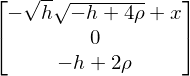

In [5]:
r23

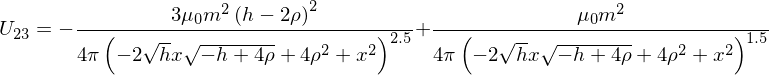

In [6]:
r23norm2 = smp.simplify(smp.expand(r23.dot(r23)))
r23norm2
U23 = -mu0/4/smp.pi*(3*m2.dot(r23)*m3.dot(r23)/(r23norm2)**(5/2)-m2.dot(m3)/(r23norm2)**(3/2))
smp.Eq(smp.symbols("U_{23}"),smp.simplify(U23))

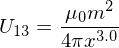

In [7]:
r13norm2 = smp.simplify(smp.expand(r13.dot(r13)))
r13norm2
U13 = -mu0/4/smp.pi*(3*m1.dot(r13)*m3.dot(r13)/(r13norm2)**(5/2)-m1.dot(m3)/(r13norm2)**(3/2))
smp.Eq(smp.symbols("U_{13}"),smp.simplify(U13))

## Magnetic dipole potential experienced by the third particle

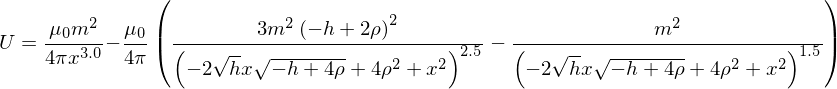

In [8]:
smp.Eq(U,U23+U13)

# Potential Extrema

We can use this expression of the potential to find the necessary conditions for a potential minimum to exist.

We begin by taking the derivative of the potential with respect to $x$

In [9]:
dU = smp.diff(U(x),x)

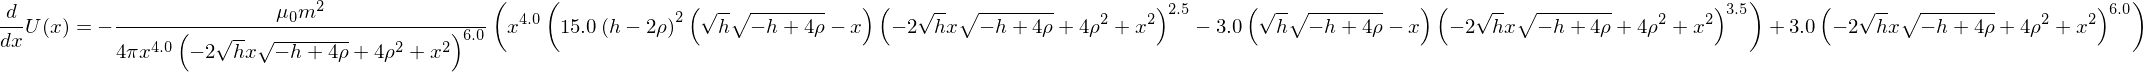

In [10]:
dUdx = smp.simplify(smp.diff(U23+U13,x))
smp.Eq(dU,dUdx)

# Visualization of the potential and equilibrium positions.

First we will plot the potential as function of height. For this we will assume $\rho=1.4\mu{}m$, but in principle we can also rescale everything in units of $\rho$.
We are also assuming $\mu_0 m^2 = 1$.

We'll plot the total potential, given by:

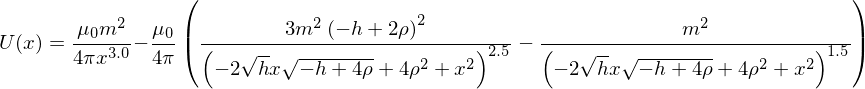

In [11]:
Ut = U23+U13
display(smp.Eq(U(x),Ut))

In [12]:
Utsubs = Ut.subs(mu0,4*smp.pi).subs(m,1)
Un = smp.lambdify((x,rho,h),Utsubs)

In [13]:
N = 300

C:\ProgramFiles\Anaconda3\lib\site-packages\numpy\__init__.py:1: RuntimeWarning: divide by zero encountered in power
  """


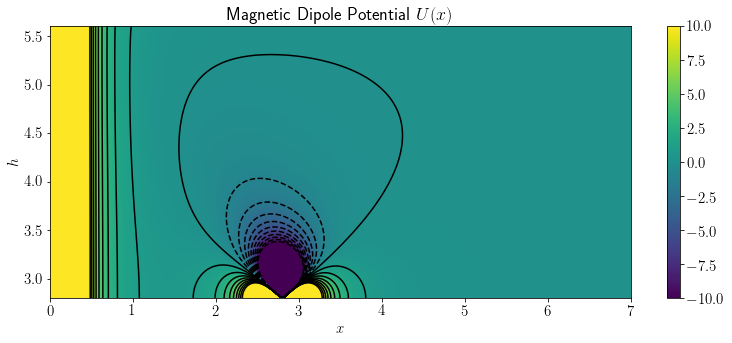

In [41]:
rhon = 1.4
hn = np.linspace(2,4,N)*rhon
xn = np.linspace(0,5,N)*rhon

[X,H] = np.meshgrid(xn,hn)

fig,ax = plt.subplots(1,1,figsize=[13,5])

Uxn = Un(X.flatten(),rhon,H.flatten()).reshape(np.shape(X))

plt.sca(ax)
plt.pcolor(X,H,Uxn)
plt.clim(-10,10)
plt.colorbar()
plt.contour(X,H,Uxn,np.arange(-10,10),colors='k')

font_size = 15
plt.rc('text', usetex=True)
plt.rc('font', size=font_size)

plt.title("Magnetic Dipole Potential $U(x)$")
plt.xlabel(r"$x$");
plt.ylabel(r"$h$");

Now we plot the derivative, $\frac{dU}{dx}$

In [15]:
dUdx = dUdx.subs(mu0,4*smp.pi).subs(m,1)
dUx = smp.lambdify((x,rho,h),dUdx)

C:\ProgramFiles\Anaconda3\lib\site-packages\numpy\__init__.py:1: RuntimeWarning: divide by zero encountered in power
  """


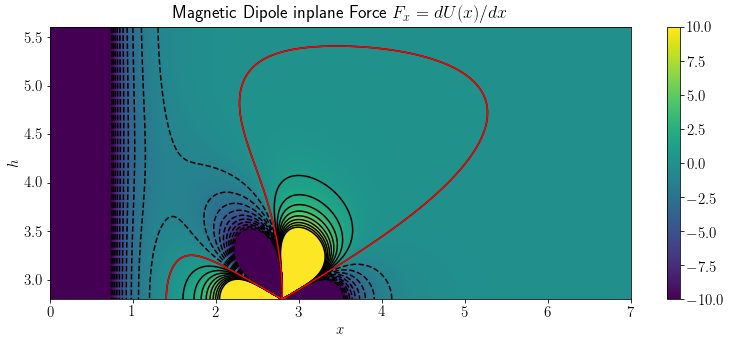

In [16]:
fig,ax = plt.subplots(1,1,figsize=[13,5])

dUxn = dUx(X.flatten(),rhon,H.flatten()).reshape(np.shape(X))

plt.sca(ax)
plt.pcolor(X,H,dUxn)
plt.clim(-10,10)
plt.colorbar()

dUxn_phase = np.angle(dUxn)
plt.contour(X,H,dUxn,np.arange(-10,10),colors='k')
plt.contour(X,H,dUxn,0,colors='r')

plt.title("Magnetic Dipole inplane Force $F_x = dU(x)/dx$")
plt.xlabel(r"$x$");
plt.ylabel(r"$h$");

In this previous plot, the red line indicates the equilibrium positions, given by the points where $dU(x)/dx = 0$

## Including the information from the excluded volume

The hard shell interaction means that we must place the constraints:
$$\left|\vec{r}_{13}\right|>2\rho$$
$$\left|\vec{r}_{23}\right|>2\rho$$

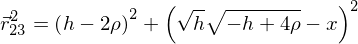

In [17]:
r12s,r13s,r23s = smp.symbols("\\vec{r}_{12} \\vec{r}_{13} \\vec{r}_{23}")
smp.Eq(r23s**2,smp.simplify(r23.dot(r23)))

$$\left(h-2\rho\right)^2+\left(\sqrt{4\rho-h}-x\right)^2>4\rho^2$$

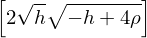

In [18]:
ineq_limit = smp.Eq(r23.dot(r23),4*rho**2)
smp.solve(ineq_limit,x)

$x>2\sqrt{4\rho h-h^2}$

C:\ProgramFiles\Anaconda3\lib\site-packages\numpy\__init__.py:1: RuntimeWarning: divide by zero encountered in power
  """


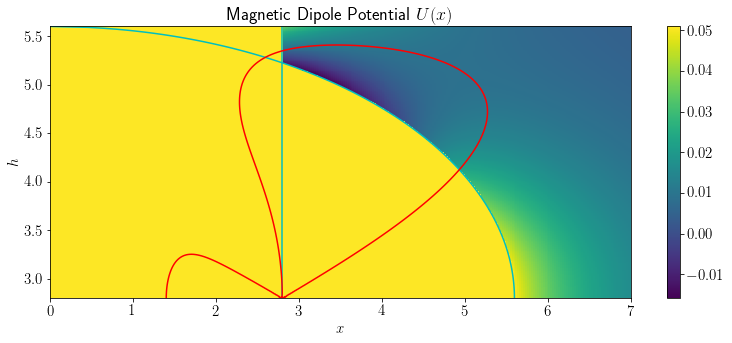

In [19]:
fig,ax = plt.subplots(1,1,figsize=[13,5])

Uxn = Un(X.flatten(),rhon,H.flatten()).reshape(np.shape(X))
HardLimit23 = X-2*np.sqrt(4*rhon*H-H**2)
HardLimit13 = X-2*rhon

HardLimit = (HardLimit23<0) | (HardLimit13<0)
UxnLim = Uxn
UxnLim[HardLimit] = np.max(UxnLim[~HardLimit])


plt.sca(ax)
plt.pcolor(X,H,UxnLim)
plt.colorbar()
plt.contour(X,H,HardLimit23,0,colors='c')
plt.contour(X,H,HardLimit13,0,colors='c')
plt.contour(X,H,dUxn,0,colors='r')


font_size = 15
plt.rc('text', usetex=True)
plt.rc('font', size=font_size)

plt.title("Magnetic Dipole Potential $U(x)$")
plt.xlabel(r"$x$");
plt.ylabel(r"$h$");

## Where are dimers possible?

Let's consider the potential between particles $1$ and $2$.

In [20]:
x2 = smp.symbols("x_2")
dx = smp.symbols("\delta{}x")

In order to calculate the transverse force, we allow small variations $\delta x$ in the position of dipole $2$

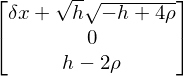

In [21]:
r12var = r12
r12var[0] = r12var[0]+dx
r12var

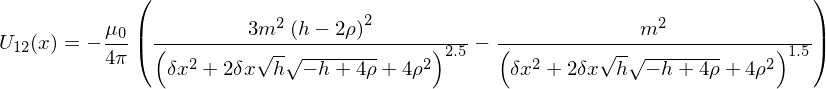

In [22]:
r12norm2 = smp.simplify(smp.expand(r12.dot(r12)))
U12 = -mu0/4/smp.pi*(3*m2.dot(r12)*m3.dot(r12)/(r12norm2)**(5/2)-m2.dot(m3)/(r12norm2)**(3/2))
display(smp.Eq(smp.symbols("U_{12}(x)"),U12))

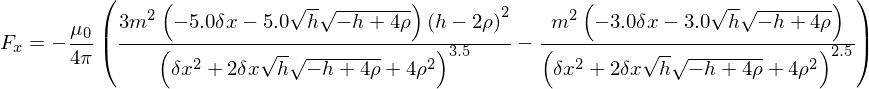

In [23]:
Fx = -smp.diff(U12,dx)
smp.Eq(smp.symbols("F_x"),smp.diff(U12,dx))

We can then evaluate the force $F_x$ around the contact positions by setting $\delta x=0$

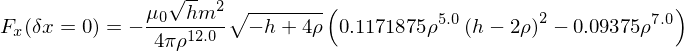

In [24]:
Fx0 = smp.simplify(Fx.subs(dx,0))
smp.Eq(smp.symbols("F_{x}(\delta{}x=0)"),Fx0)

In [25]:
dimer_roots = smp.solve(smp.Eq(Fx0,0),h)
dimer_roots

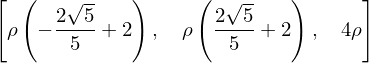

In [26]:
[smp.nsimplify(d/rho)*rho for d in dimer_roots]

We already established the restriction $2\rho<h<4\rho$, which leaves us with the root $h = 2+\frac{2}{\sqrt{5}}$

In [27]:
Fxsubs = Fx0.subs(m,1).subs(mu0,1)
Fx_n = smp.lambdify((h,rho),Fxsubs)

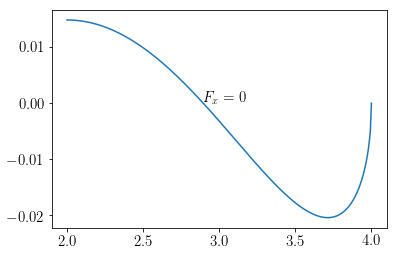

In [28]:
plt.plot(hn/rhon,Fx_n(hn/rhon,1))
plt.annotate(r"$F_x=0$",[2+2/5**(1/2),0])

And obviously the force is negative for $h>2+\frac{2}{\sqrt{5}}$

Going back to the potential diagram:

C:\ProgramFiles\Anaconda3\lib\site-packages\numpy\__init__.py:1: RuntimeWarning: divide by zero encountered in power
  """


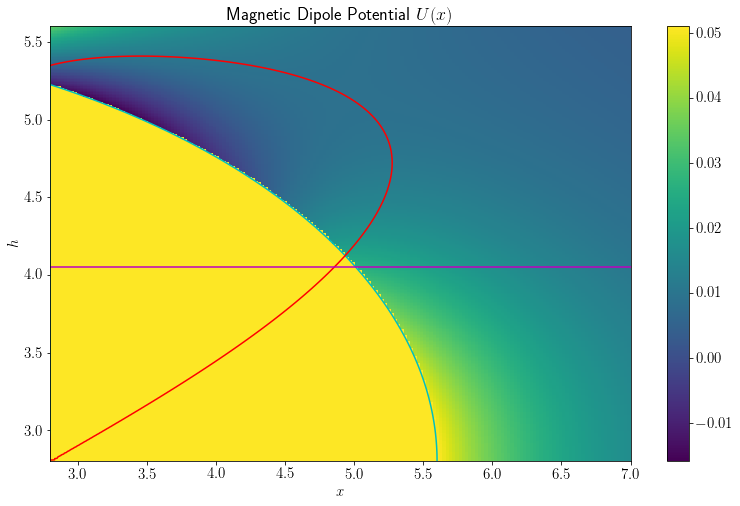

In [29]:
fig,ax = plt.subplots(1,1,figsize=[13,8])

Uxn = Un(X.flatten(),rhon,H.flatten()).reshape(np.shape(X))
HardLimit23 = X-2*np.sqrt(4*rhon*H-H**2)
HardLimit13 = X-2*rhon

HardLimit = (HardLimit23<0) | (HardLimit13<0)
UxnLim = Uxn
UxnLim[HardLimit] = np.max(UxnLim[~HardLimit])


plt.sca(ax)
plt.pcolor(X,H,UxnLim)
plt.colorbar()
plt.contour(X,H,HardLimit23,0,colors='c')
plt.contour(X,H,HardLimit13,0,colors='c')
plt.contour(X,H,dUxn,0,colors='r')
plt.contour(X,H,Fx_n(H,rhon),0,colors='m')

font_size = 15
plt.rc('text', usetex=True)
plt.rc('font', size=font_size)

plt.title("Magnetic Dipole Potential $U(x)$")
plt.xlabel(r"$x$");
plt.ylabel(r"$h$");
plt.xlim([2*rhon,np.max(X)])

Summarizing: 

* Bellow the magenta line, dimers are imposible.
* Below the cyan line, in the yellow region, particles overlap. This is also forbiden. 
* The red line represents a maximum point of the potential. When the red line is above the ovelap region the third particle is short range attracted to the dimer. It's always long range repelled. The particle is only attracted when it's inside the red line. 
* There is a very small region in which the third particle is always repelled. 

# Symbolic expression for equilibrium positions (doesn't work)

In this section we attempt to find the roots of the derivative of the potential. This doesn't work yet. 

We now equate it to zero to find extrema in the potential:

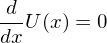

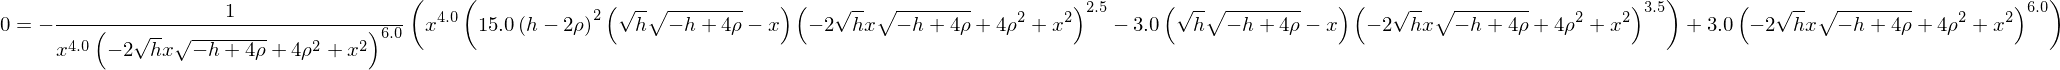

In [30]:
display(smp.Eq(dU,0))
display(smp.Eq(0,dUdx))

### The first factor

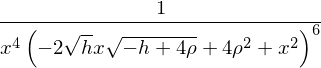

In [31]:
factor1 = 1/(x**4*r23norm2**6)
factor1

is only zero at infinity. However it is singular (and infinite) at zero and:

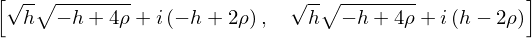

In [32]:
smp.solve(smp.Eq(r23norm2,0),x)

Which is when $\left|\vec{r}_{23}\right|=0$ and it never happens because the third particle is constrained to the $z=0$ plane

### The second factor

The second factor is given by:

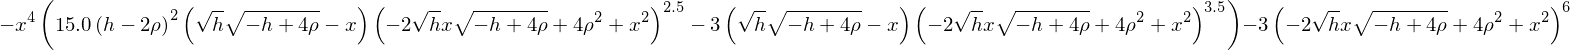

In [33]:
factor2 = (dUdx/factor1).subs(3.0,3).subs(6.0,6).subs(4.0,4)
factor2

We can simplify this by defining a lengthscale $\alpha$

In [34]:
alpha = smp.symbols("alpha",positive=True,real=True)
alphadef = smp.sqrt(h*(4*rho-h))
smp.Eq(alpha,smp.sqrt(h*(4*rho-h)))

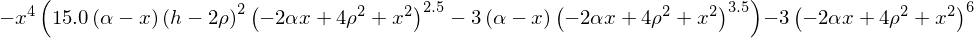

In [35]:
factor2.subs(smp.sqrt(h*(4*rho-h)),alpha)

which has roots given by

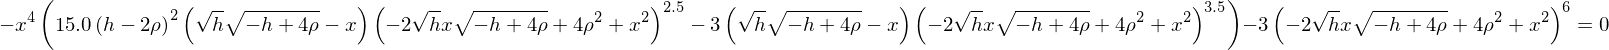

In [36]:
extrema = smp.Eq(factor2,0)
extrema

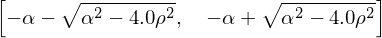

In [37]:
roots = smp.solve(extrema.subs(smp.sqrt(h*(4*rho-h)),-alpha),x)
display(roots)

substituting back the original definition of $\alpha$

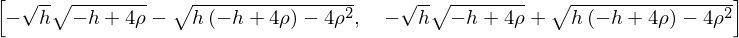

In [38]:
roots2 = [r.subs(alpha,alphadef).subs(4.0,4) for r in roots]
display(roots2)

In [39]:
e1 = -h*(h-4*rho)-4*rho**2
e2 = -(h-2*rho)**2
display(smp.Eq(e1,e2))
display(smp.expand(smp.Eq(e1,e2)))

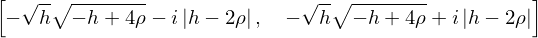

In [40]:
roots3 = [smp.simplify(r).subs(e1,e2) for r in roots2]
roots3

Since particles must fit in the cell, $h>2\rho$. Since we don't want them on top of each other, $h<4\rho$. This means we can write:

$$x\bigr|_{\delta U=0} = -\sqrt{4\rho-h}\pm \left(h-2\rho\right)i$$

In what follows we'll see that the solving algorithm must be missing some solution. This makes sense because the equation is sixth order and we are only obtaining two solutions. 